# Capstone Project
### Time series prediction of market prices.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import selenium
import plotly
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot,plot
import cufflinks as cf
cf.go_offline()
%matplotlib inline

# Data Collection

First data gathering attempt.

In [1352]:
key='f6797fe96fc34e0887f47ae1'
url='https://xivapi.com/market/gilgamesh/items/18019/history?key={}&language=en&columns=History.*1000.PricePerUnit,History.*100.PurchaseDate'.format(key)
# # API call. 
item=requests.get(url)
dt=pd.DataFrame(item.json()['History'])
dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
PricePerUnit    20 non-null float64
PurchaseDate    20 non-null float64
dtypes: float64(2)
memory usage: 15.7 KB


#### We saw above the API only gives 20 rows in history. that means it's the time for WEB SCRAPING!!!!.

In [13]:
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
from time import sleep

def web_scraper(N=949,url="https://www.ffxivmb.com/Items/Gilgamesh/18019"):
    
    # # prepair the data
    data_dict={'price':[],
               'quantity':[],
               'total':[],
               'name':[],
               'date':[]}

    # # open the driver
    driver = webdriver.Chrome(executable_path="./chromedriver")
    
    
    # # visit the website
    driver.get(url)
    sleep(5)
    # # loop through a page and collect the data n times
    for n in range(N):
        soup=BeautifulSoup(driver.page_source)
        lst=[]
        counter=0
        for i in soup.find_all('div',{'id':'table3_wrapper'}):
            for k in i.find_all('tr',{'style':'background-color: rgba(52, 53, 52, 0.78);'}):
                k=k.text.strip().split('\n')
                data_dict['price'].append(k[0])
                data_dict['quantity'].append(k[1])
                data_dict['total'].append(k[2])
                data_dict['name'].append(k[3])
                data_dict['date'].append(k[4])

        # # find the search position

        elem = driver.find_element_by_css_selector('#table3_next')
        
        # # click the next button
        elem.click()
        
    return data_dict

data_dict=web_scraper()

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/shadows/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/shadows/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this wa

In [14]:
# # Save the data locally
pd.DataFrame(data_dict).to_csv('data.csv',index=False)


# EDA

In [15]:
# # read the data
df=pd.read_csv('data.csv')
df.drop('name',axis=1,inplace=True)
df.head()

,price,quantity,total,date
0,"14,945",98,"1,464,610",2019-05-16 09:24:04
1,"12,000",1,"12,000",2019-05-16 09:02:54
2,"12,000",1,"12,000",2019-05-16 09:02:53
3,"12,000",1,"12,000",2019-05-16 08:55:07
4,"12,000",1,"12,000",2019-05-16 08:54:39


In [17]:
# # checking data types
df.dtypes

price       object
quantity     int64
total       object
date        object
dtype: object

In [18]:
# # change the dates into datetime format
df['date']=pd.to_datetime(df['date'])
df.date.describe()

# # sorting and setting the timeline as index
df.sort_values('date',inplace=True)
df.set_index('date',inplace=True,drop=True)


# # fixing the numbers within the dataframe
df.price=df.price.apply(lambda x: x.replace(',',''))
df.total=df.total.apply(lambda x: x.replace(',',''))

# # changing data-type into float
df=df.applymap(lambda x: float(x) if str.isdigit(str(x)) else x)
dft=df.copy()
df.dtypes

# # plotting the distribution
plt.figure(figsize=(15,8))
df.price.plot();

# # removing outliers with pct change.
df_pct=df.price.pct_change()
df_pct.fillna(np.nanmedian(df_pct),inplace=True)
mask=(df_pct-np.mean(df_pct))>np.std(df_pct)*3
df=df[~mask]
plt.figure(figsize=(15,8))
df.price.plot();

# # We want to resample our data to have the same time interval
x='D'

df=df.resample(x).mean()

# # connect the missing points in our sampled data

df.interpolate(method='linear',inplace=True)

# # error check

df.shape

count                    9490
unique                   9477
top       2019-01-06 03:29:31
freq                        2
first     2018-08-25 12:11:28
last      2019-05-16 09:24:04
Name: date, dtype: object

In [28]:
df.price.describe()

count      265.000000
mean     29194.495025
std      12920.933336
min      10025.456522
25%      17473.586364
50%      27533.800000
75%      38738.669737
max      62474.141026
Name: price, dtype: float64

In [18]:
# # extract features from the time series
df['dayofweek']=df.index.dayofweek
df['weekofyear']=df.index.weekofyear
df['month']=df.index.month
df['hour']=df.index.hour

<Figure size 1080x576 with 0 Axes>

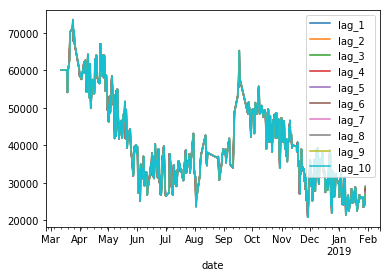

In [19]:
# # extract lags for supervised learning settings
lags=[1,2,3,4,5,6,7,8,9,10]
lagged={'lag_{}'.format(i):df.price.shift(i) for i in lags}
lagged_df=pd.DataFrame(lagged)
# # plot the smoothed lags
plt.figure(figsize=(15,8))
lagged_df.rolling(20).mean().plot();

In [1445]:
# # adding the lags into our main data frame
for i,k in zip(range(1,lagged_df.shape[1]+1),range(lagged_df.shape[1])):
    df['lag_{}'.format(i)]=lagged_df.iloc[:,k]

In [1446]:
# # extracting percentiles, min, max, and std for all lags
from functools import partial
for k in range(1,lagged_df.shape[1]+1):
    percentiles = [25, 50, 75]
    percentile_func = [partial(np.percentile, q=perc) for perc in percentiles]
    df_smooth = df['lag_{}'.format(k)].rolling(10)
    desc_features=df_smooth.aggregate([np.min,np.max,np.mean,np.std])
    perc_features = df_smooth.aggregate(percentile_func)

    for i in range(desc_features.shape[1]):
        df['desc{}_{}'.format(k,i)]=desc_features.iloc[:,i]

    for i in range(perc_features.shape[1]):
        df['perc{}_{}'.format(k,i)]=perc_features.iloc[:,i]

In [1447]:
# # checking out the missing values within the lags
df.isnull().sum()

price          0
quantity       0
total          0
dayofweek      0
weekofyear     0
month          0
hour           0
lag_1          1
lag_2          2
lag_3          3
lag_4          4
lag_5          5
lag_6          6
lag_7          7
lag_8          8
lag_9          9
lag_10        10
desc1_0       10
desc1_1       10
desc1_2       10
desc1_3       10
perc1_0       10
perc1_1       10
perc1_2       10
desc2_0       11
desc2_1       11
desc2_2       11
desc2_3       11
perc2_0       11
perc2_1       11
              ..
perc6_1       15
perc6_2       15
desc7_0       16
desc7_1       16
desc7_2       16
desc7_3       16
perc7_0       16
perc7_1       16
perc7_2       16
desc8_0       17
desc8_1       17
desc8_2       17
desc8_3       17
perc8_0       17
perc8_1       17
perc8_2       17
desc9_0       18
desc9_1       18
desc9_2       18
desc9_3       18
perc9_0       18
perc9_1       18
perc9_2       18
desc10_0      19
desc10_1      19
desc10_2      19
desc10_3      19
perc10_0      

In [1448]:
# # replacing out the missing values with median    
for i in df.columns:
    df[i].fillna(value=np.nanmedian(df[i]),inplace=True)

In [29]:
df.isnull().sum().sum()


0

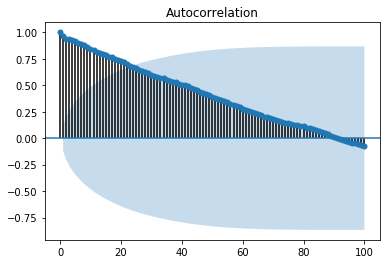

In [30]:
# # plotting the autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.price,lags=100);


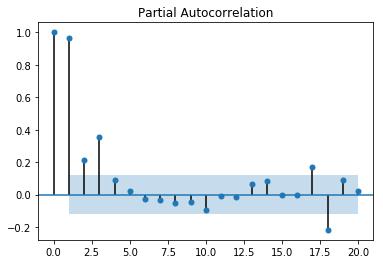

In [31]:
# # plotting the parital auto correlation
from statsmodels.graphics.tsaplots import plot_pacf,seasonal_plot
plot_pacf(df.price,lags=20);

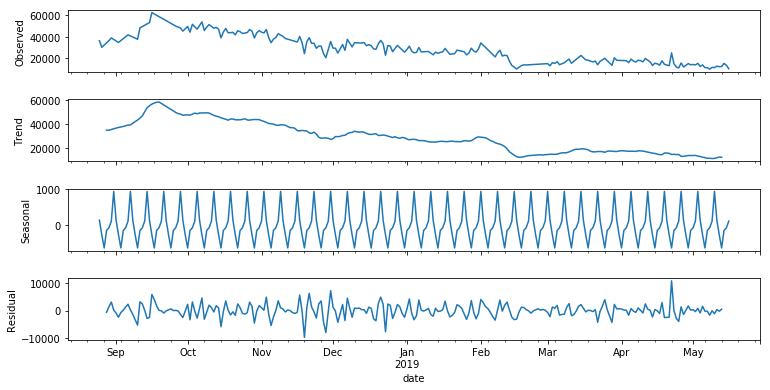

In [33]:
# # plotting the seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df.price);

result.plot().set_size_inches(12,6);

In [34]:
# # define Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries,maxlag=None,regression='c',autolag='AIC'):
    '''Perform Dickey-Fuller test and print out results'''
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,maxlag=maxlag,regression=regression,autolag=autolag)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in list(dftest[4].items()):
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 


In [37]:
# # perfurming the Dicky-Fuller test it seems that we need to differentiate
test_stationarity(df.diff().dropna().price)

Results of Dickey-Fuller Test:
Test Statistic                -1.310483e+01
p-value                        1.680854e-24
#Lags Used                     2.000000e+00
Number of Observations Used    2.610000e+02
Critical Value (1%)           -3.455656e+00
Critical Value (5%)           -2.872678e+00
Critical Value (10%)          -2.572705e+00
dtype: float64


# Modeling

In [40]:
# # splitting the train and test sets
import math
train_df=df.iloc[:math.ceil(df.shape[0]*0.8)]
test_df=df.iloc[math.ceil(df.shape[0]*0.8):]

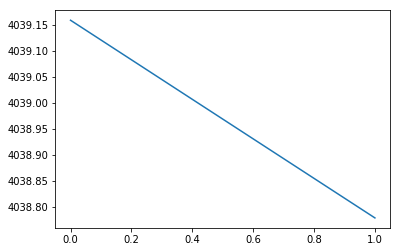

In [41]:
# # checking the best value for AR by comparing the BIS (lower is better)
from statsmodels.tsa.arima_model import ARMA, ARIMA, AR
lst=[]
for i in range(0,2):
    try:
        arima=ARIMA(train_df.price,order=(i,1,0))
        result=arima.fit()
        lst.append(result.bic)
    except:
        continue
    
best_q=np.argmin(lst)    
plt.plot(lst)


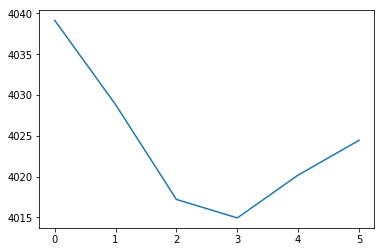

In [42]:
# # checking the best value by comparing the BIS (lower is better)
from statsmodels.tsa.arima_model import ARMA, ARIMA, AR
lst=[]
for i in range(0,6):
    try:
        arima=ARIMA(train_df.price,order=(0,1,i))
        result=arima.fit()
        lst.append(result.bic)
    except:
        continue

best_p=np.argmin(lst)   
plt.plot(lst)

In [43]:
# # taking out the best values for AR and MA then applying it into ARIMA model
from sklearn.metrics import mean_squared_error,r2_score
arima=ARIMA(train_df.price,order=(best_q,1,best_p))
result=arima.fit()

print('RMSE: ',np.sqrt(mean_squared_error(test_df.price,\
                                         result.predict(start=len(train_df),\
                                                        end=len(train_df)+len(test_df)-1,typ='levels'))))
print('R2_score: ',r2_score(test_df.price,result.predict(start=len(train_df),\
                                                        end=len(train_df)+len(test_df)-1,typ='levels')))



RMSE:  2403.1149745354346
R2_score:  0.3649335062335445


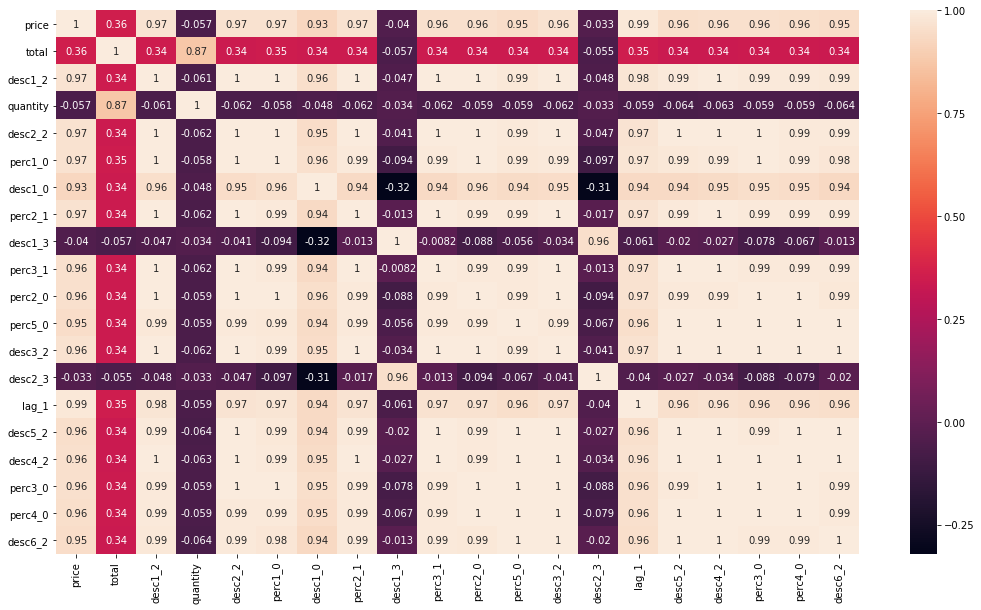

In [1534]:
# # checking the correlation
columns=abs(df.pct_change().dropna().corr()['price']).nlargest(20).index
columns
plt.figure(figsize=(18,10))
sns.heatmap(df[columns].corr(),annot=True)
# # we can see many redundant features since the time line between each observation is merely 4 seconds.

In [1550]:
# # trying out some models for the supervised settings
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit,cross_val_score,cross_val_predict

cv=TimeSeriesSplit(n_splits=10)
# # we are trying to predict 4 seconds into the future so one lag is enough to bring out good accuracy
X=df[['lag_1']]
y=df.price

rf=RandomForestRegressor()
lm=LinearRegression()

print('Linear Regression : ',cross_val_score(lm,X,y,cv=cv,scoring='r2').mean())
print('Random Forest     : ',cross_val_score(rf,X,y,cv=cv,scoring='r2').mean())

Linear Regression :  0.8285231488158044
Random Forest     :  0.5517316503951851


In [1546]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['price','date'])
for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['price'][i] = data['price'][i]

#setting index
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:math.ceil(df.shape[0]*0.8),:]
valid = dataset[math.ceil(df.shape[0]*0.8):,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))



In [1547]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [1552]:
# # calculating the RMSE for LSTM, it's a heavy model so i ran it in cloud.
from sklearn.metrics import r2_score
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
# # calculating the R2 score for LSTM, it's a heavy model so i ran it in cloud.
LSTM=r2_score(closing_price,valid)

In [1558]:
# # we can see how impressive LSTM is scoring 0.75 without proper tuning and only with date as feature.
arima=0.21531721669191006
lr=0.8285231488158044
rf=0.5517316503951851
lstm=0.751582332202349
data_dict={'ARIMA':arima,'Linear Regression':lr,'Random Forest':rf,'LSTM with dates only no lags':lstm}
data_dict

{'ARIMA': 0.21531721669191006,
 'Linear Regression': 0.8285231488158044,
 'Random Forest': 0.5517316503951851,
 'LSTM with dates only no lags': 0.751582332202349}

In [45]:
import pickle

pickle.dump(result, open('model.pkl', 'wb'))

In [117]:
%%writefile ./time_series.py
import flask
from flask import render_template
from flask_cors import CORS, cross_origin
app = flask.Flask(__name__)
cors = CORS(app)
app.config['CORS_HEADERS'] = 'Content-Type'

#--------  Hello Message  -----------#

@app.route('/')
def greetings():
    return """Welcome"""

#-------- MODEL GOES HERE -----------#

import pickle
with open('model.pkl', 'rb') as picklefile:
    model = pickle.load(picklefile)

#-------- ROUTES GO HERE -----------#

import numpy as np
import pandas as pd

@app.route('/data',methods=['GET'])
def getData():
        # # read the data
    df=pd.read_csv('data.csv')
    df.drop(['name','quantity','total'],axis=1,inplace=True)
    # # change the dates into datetime format
    df['date']=pd.to_datetime(df['date'])

    # # sorting and setting the timeline as index
    df.sort_values('date',inplace=True)
    df.set_index('date',inplace=True,drop=True)


    # # fixing the numbers within the dataframe
    df.price=df.price.apply(lambda x: x.replace(',',''))
    

    # # changing data-type into float
    df=df.applymap(lambda x: float(x) if str.isdigit(str(x)) else x)

    # # removing outliers with pct change.
    df_pct=df.price.pct_change()
    df_pct.fillna(np.nanmedian(df_pct),inplace=True)
    mask=(df_pct-np.mean(df_pct))>np.std(df_pct)*3
    df=df[~mask]

    # # We want to resample our data to have the same time interval
    x='D'

    df=df.resample(x).mean()

    # # connect the missing points in our sampled data

    df.interpolate(method='linear',inplace=True)
    
    
    df.index=list(df.index.astype(str))
    return flask.jsonify(df.to_dict())

if __name__ == '__main__':
    '''Connects to the server'''

    HOST = '127.0.0.1'
    PORT = 5000

    app.run(HOST, PORT)

Overwriting ./time_series.py


In [79]:
df.index.dt.strftime('%Y-%m-%d')

AttributeError: 'DatetimeIndex' object has no attribute 'dt'

In [92]:
for i,v in enumerate(df.index):
    df.index[i]=str(v)

TypeError: Index does not support mutable operations

['2018-08-25',
 '2018-08-26',
 '2018-08-27',
 '2018-08-28',
 '2018-08-29',
 '2018-08-30',
 '2018-08-31',
 '2018-09-01',
 '2018-09-02',
 '2018-09-03',
 '2018-09-04',
 '2018-09-05',
 '2018-09-06',
 '2018-09-07',
 '2018-09-08',
 '2018-09-09',
 '2018-09-10',
 '2018-09-11',
 '2018-09-12',
 '2018-09-13',
 '2018-09-14',
 '2018-09-15',
 '2018-09-16',
 '2018-09-17',
 '2018-09-18',
 '2018-09-19',
 '2018-09-20',
 '2018-09-21',
 '2018-09-22',
 '2018-09-23',
 '2018-09-24',
 '2018-09-25',
 '2018-09-26',
 '2018-09-27',
 '2018-09-28',
 '2018-09-29',
 '2018-09-30',
 '2018-10-01',
 '2018-10-02',
 '2018-10-03',
 '2018-10-04',
 '2018-10-05',
 '2018-10-06',
 '2018-10-07',
 '2018-10-08',
 '2018-10-09',
 '2018-10-10',
 '2018-10-11',
 '2018-10-12',
 '2018-10-13',
 '2018-10-14',
 '2018-10-15',
 '2018-10-16',
 '2018-10-17',
 '2018-10-18',
 '2018-10-19',
 '2018-10-20',
 '2018-10-21',
 '2018-10-22',
 '2018-10-23',
 '2018-10-24',
 '2018-10-25',
 '2018-10-26',
 '2018-10-27',
 '2018-10-28',
 '2018-10-29',
 '2018-10-